# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [19]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

Steps Involved in any Multiple Linear Regression Model

Step #1: Data Pre Processing 
1.   Importing The Libraries.
2.   Importing the Data Set.
3.   Encoding the Categorical Data.
4.   Avoiding the Dummy Variable Trap.
5.   Splitting the Data set into Training Set and Test Set.

Step #2: Fitting Multiple Linear Regression to the Training set 

Step #3: Predict the Test set results.

In [21]:
# 1.3.1.2
# implement Linear Regression

In [22]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [23]:
print(x_train[1].shape)
print(x_train.shape)

(25,)
(240, 25)


In [24]:
def gradientDescent(x,y,w,b,learning_rate,ep,temp):
  cost_record=[]
  # print(w.shape)
  epochs=[]
  m=len(y)
  pl=1
  for i in range((ep)):
    epochs.append(i+1)
    pl = b+x.dot(w)
    eq=(pl)-y
    temp1 = (x.T.dot(eq))
    w=w-learning_rate*(temp1/m)
    b=b-learning_rate*((np.sum(eq))/m)
    k = (x.dot(w) + b)
    c=np.sum(((k - y) ** 2) / (2*len(y)))
    cost_record.append(c)
  return cost_record,epochs,w,b

In [36]:
lr=[1,0.6,0.03,0.003,0.0005]
c_rs=[]
for i in lr:
  costrecord,eps,w,b= gradientDescent(x_train,y_train,np.zeros(x_train.shape[1]),0,i,3000,0)
  c_rs.append(costrecord)

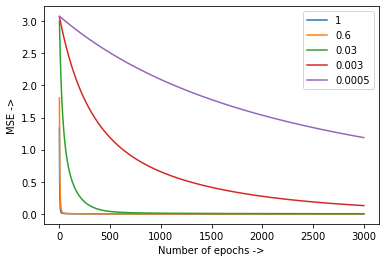

In [37]:
# 1.3.2.3
# try with different learning rates and choose the best one
def plotgraph():
  plt.xlabel("Number of epochs ->")
  plt.ylabel("MSE ->")
  for i in range(len(lr)):
    plt.plot(eps, c_rs[i], label = lr[i])
  plt.legend()
  plt.show()
plotgraph()

In [27]:
cr,eps,w,b= gradientDescent(x_train,y_train,np.zeros(x_train.shape[1]),0,0.6,3000,0)

In [28]:
print(b)

-0.9827453654417202


In [29]:
print(w)

[-5.08692805  1.04181724 -0.76186935 -0.40537622  0.24529611 -0.52417983
  0.35710624 -0.38034997  0.26115892 -0.22288637  0.1439381  -0.10151664
  0.05112973 -0.01893439 -0.011727    0.03235437 -0.04947925  0.06060975
 -0.06850343  0.07263829 -0.07430087  0.07355842 -0.07108168  0.06707046
 -0.06191113]


In [30]:
print(c_rs)

[[1.3391648017545048, 0.8210498298656128, 0.5786309359106491, 0.4267076477188093, 0.319867627337854, 0.24196318435069447, 0.1845163666874856, 0.14197185502958087, 0.11037895198323414, 0.08685707017766181, 0.06929066330342848, 0.05612271994456498, 0.046206456484852, 0.038696908984989856, 0.03297129012515361, 0.02857039530300659, 0.02515547695548869, 0.022476499422533658, 0.020348769718113262, 0.018635733458168383, 0.017236308862848587, 0.016075561226193014, 0.01509783633835049, 0.014261704002934477, 0.013536234041478395, 0.01289825322718817, 0.01233032437129365, 0.011819257078341016, 0.01135500995508969, 0.010929881058695747, 0.010537910605316048, 0.010174440007646297, 0.009835786066404178, 0.009519000002831944, 0.009221689014793664, 0.008941883924556755, 0.0086779408187633, 0.00842846777031678, 0.00819227007965014, 0.007968309201184066, 0.007755671793194104, 0.007553546266107664, 0.007361204894009254, 0.007177990062038191, 0.0070033035963988355, 0.006836598399194747, 0.0066773718132387

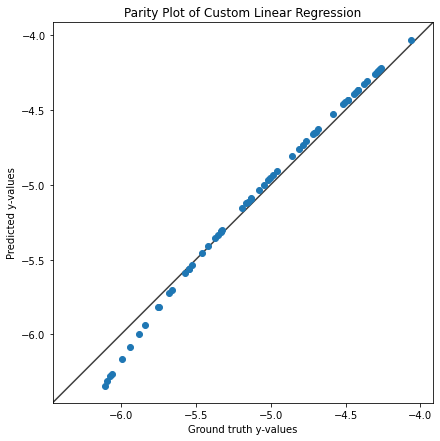

Test error:  5.851416029437022 %
Test accuracy:  94.14858397056298 %


In [31]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
y_pred= x_test.dot(w) + b
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

error = (1/x_test.shape[0])*np.sum(np.abs(y_pred - y_test))
print("Test error: ", error*100, "%")
print("Test accuracy: ", (1-error)*100, "%")

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. 
Ridge regression was developed as a possible solution to the imprecision of least square estimators when linear regression models have some multicollinear (highly correlated) independent variables—by creating a ridge regression estimator (RR). This provides a more precise ridge parameters estimate, as its variance and mean square estimator are often smaller than the least square estimators previously derived.

In [32]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
mse_r=[]
alphas=[0,0.1,0.5,0.05,0.07,0.003,0.005,0.0003,0.0007,0.00003,0.0007]
for i in alphas:
  pl=0
  model = Ridge(alpha=i)
  model.fit(x_train, y_train)
  y_pr=model.predict(x_test)
  mse_r.append(mean_squared_error(y_test, y_pr,squared=False))
df=pd.DataFrame(list(zip(alphas,mse_r)),columns=['Alpha Values','RMSE'])
df

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

,Alpha Values,RMSE
0,0.00000,3.408742e-07
1,0.10000,1.093486e-01
2,0.50000,6.049920e-02
3,0.05000,1.883462e-01
4,0.07000,1.476402e-01
5,0.00300,2.296589e-01
6,0.00500,2.800816e-01
7,0.00030,8.715538e-02
8,0.00070,2.923870e-02
9,0.00003,1.175974e-01


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

* Alpha is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. 
* With alpha set to zero, ridge regression model is the equivalent of the linear regression model, and a larger value penalizes the optimization function. 
* Alpha can be any real-valued number between zero and infinity. 
* The larger the value of alpha, the more aggressive the penalization is.
* As Alpha increases, the slope of the regression line is reduced and becomes more horizontal.
* As Alpha increases, the model becomes less sensitive to the variations of the independent variable.

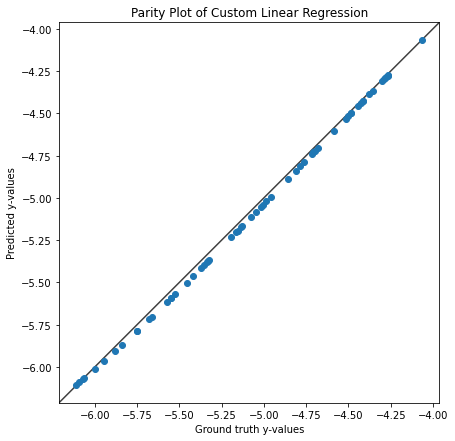

Test error:  2.581592710729798 %
Test accuracy:  97.4184072892702 %


In [33]:
# 1.3.2.4fig, ax = plt.subplots(figsize=(7,7))
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pr)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

error = (1/x_test.shape[0])*np.sum(np.abs(y_pr - y_test))
print("Test error: ", error*100, "%")
print("Test accuracy: ", (1-error)*100, "%")

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

1.3.3.1

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 
Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.

In [34]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Lasso
alphas=[0.1,0.5,0.03,0.09,0.009,0.003,0.0005,0.0007,0.00009,0.009]
mse_l=[]
for i in alphas:
  model = Lasso(alpha=i)
  model.fit(x_train, y_train)
  pl=0
  y_pr=model.predict(x_test)
  mse_l.append(mean_squared_error(y_test, y_pr,squared=False))
df=pd.DataFrame(list(zip(alphas,mse_l)),columns=['alpha','RMSE'])
df

,alpha,RMSE
0,0.10000,0.414369
1,0.50000,2.126746
2,0.03000,0.121857
3,0.09000,0.371843
4,0.00900,0.030598
5,0.00300,0.217525
6,0.00050,0.268545
7,0.00070,0.183407
8,0.00009,0.624034
9,0.00900,0.030598


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

1.3.3.3 Answer
* Alpha is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. 
* With alpha set to zero, lasso regression model is the equivalent of the linear regression model, and a larger value penalizes the optimization function. 
* Alpha can be any real-valued number between zero and infinity. 
* The larger the value of alpha, the more aggressive the penalization is.
* The effect of Alpha on Lasso regression is similar to its effect on ridge regression.
* As Alpha increases, the slope of the regression line is reduced and becomes more horizontal.
* As Alpha increases, the model becomes less sensitive to the variations of the independent variable.

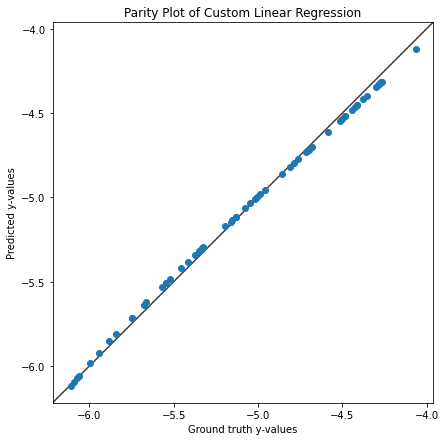

Test error:  2.6982545965054325 %
Test accuracy:  97.30174540349456 %


In [35]:
# 1.3.3.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pr)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

error = (1/x_test.shape[0])*np.sum(np.abs(y_pr - y_test))
print("Test error: ", error*100, "%")
print("Test accuracy: ", (1-error)*100, "%")